# Import the Dataframe

In [1]:
import pandas as pd
df = pd.read_csv('df5.csv')

In [2]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Grade Average 7',
 'Grade Average 8',
 'Math_7_score',
 'ELA_7_score',
 'Math_8_score',
 'ELA_8_score',
 'Absent Grade 7',
 'Tardy Grade 7',
 'Absent Grade 8',
 'Tardy Grade 8',
 'Gender',
 'target',
 'Absent Total',
 'Tardy Total',
 'Average Grade MS',
 'Average Math Score',
 'Average ELA Score',
 'Num of Above Average Comments',
 'Num of Meets Acceptable Comments',
 'Num of Incomplete Work Comments',
 'Num of Outstanding Effort Comments',
 'Num of Unprepared for Class Comments',
 'Num of Inattentive in Class Comments',
 'Num of Poor Tests Comments',
 'Num of Conscientious Comments',
 'Num of Improvement Noted Comments',
 'Num of Imcomplete Homework Comments',
 'Num of Parent Conference Requested Comments',
 'Num of Poor Class Attendance Comments',
 'Num of Excessive Lateness Comments',
 'Comments',
 "('ability',)",
 "('about',)",
 "('above',)",
 "('absences',)",
 "('absent',)",
 "('academic',)",
 "('acceptable',)",
 "('according',)",
 "('accumulated'

#### Drop the columns that we do not need:
- Target because clustering is a unsupervised technique and target tells us where they land
- Comments because it contains words

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'target', 'Comments'], axis=1)

In [4]:
list(df.columns)

['Grade Average 7',
 'Grade Average 8',
 'Math_7_score',
 'ELA_7_score',
 'Math_8_score',
 'ELA_8_score',
 'Absent Grade 7',
 'Tardy Grade 7',
 'Absent Grade 8',
 'Tardy Grade 8',
 'Gender',
 'Absent Total',
 'Tardy Total',
 'Average Grade MS',
 'Average Math Score',
 'Average ELA Score',
 'Num of Above Average Comments',
 'Num of Meets Acceptable Comments',
 'Num of Incomplete Work Comments',
 'Num of Outstanding Effort Comments',
 'Num of Unprepared for Class Comments',
 'Num of Inattentive in Class Comments',
 'Num of Poor Tests Comments',
 'Num of Conscientious Comments',
 'Num of Improvement Noted Comments',
 'Num of Imcomplete Homework Comments',
 'Num of Parent Conference Requested Comments',
 'Num of Poor Class Attendance Comments',
 'Num of Excessive Lateness Comments',
 "('ability',)",
 "('about',)",
 "('above',)",
 "('absences',)",
 "('absent',)",
 "('academic',)",
 "('acceptable',)",
 "('according',)",
 "('accumulated',)",
 "('add',)",
 "('advantage',)",
 "('affecting',)",


#### Encode Gender column

In [5]:
df['Gender'] = df['Gender'].map({"'M'": 0, "'F'": 1})

# Clustering using K-Means
- `n_clusters=2` because we only want two classes to fall into.

In [6]:
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=2).fit(df)

In [7]:
k_cluster_predictions = k_cluster.predict(df)

In [8]:
df['K means Group'] = k_cluster_predictions

#### Group by `K-Means Group` to check it's statistics and make conclusions

- **Looking at the mean and median of the the groups, it would seem as though 0 in `K means Group` is the students that would be accepted, because their grades are higher than those of group 1.**
    - Target 0: Accepted
    - Target 1: Not accepted

In [9]:
df.groupby(['K means Group']).mean()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('will',)","('with',)","('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)"
K means Group,,,,,,,,,,,,,,,,,,,,,
0,79.223776,81.186014,2.897902,3.478322,2.896503,3.373427,5.574825,3.194406,5.430769,5.851748,...,0.000034,0.000129,0.000034,0.071500,0.000057,0.000021,0.000021,0.000000,0.000400,0.000014
1,3.888889,27.052632,0.122807,0.140351,0.649123,0.567251,1.058480,0.730994,2.690058,2.292398,...,0.000000,0.000225,0.000055,0.053848,0.000112,0.000000,0.000000,0.000244,0.000585,0.000000


In [10]:
df.groupby(['K means Group']).median()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('will',)","('with',)","('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)"
K means Group,,,,,,,,,,,,,,,,,,,,,
0,80,82,3,4,3,4,4,1,4,3,...,0.0,0.0,0.0,0.074627,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0


#### Check the length of each group:

In [11]:
len(df[df['K means Group']==0])

715

In [12]:
len(df[df['K means Group']==1])

171

# Comparing true values vs. K-Means values

#### Import the dataframe with only the `target` column for comparison

In [13]:
df1 = pd.read_csv('df5.csv')
df1 = df1[['target']]

#### Concat the dataframes

In [14]:
compare = pd.concat([df1, df[['K means Group']]], axis=1)

In [15]:
compare

,target,K means Group
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
881,0,1
882,0,0
883,0,0
884,0,0


#### What percentage of the students in each were accepted from each cluster?

- **This shows that indeed cluster 0, is students who are accepted versus cluster 1, because the number of true accepted students are in that cluster.**

In [16]:
print('Number of students accepted from Cluster 0:', len(compare[(compare.target == 1) & (compare['K means Group'] == 0)]))
print('Number of students accepted from Cluster 1:', len(compare[(compare.target == 1) & (compare['K means Group'] == 1)]))

Number of students accepted from Cluster 0: 214
Number of students accepted from Cluster 1: 4


- **The percentage of students were accepted is only 24%.**

In [17]:
print('Percent of accepted students from Cluster 0:', round((214/886)*100, 2), '%')

Percent of accepted students from Cluster 0: 24.15 %


# Increase the number of clusters.
- Use the `elbow method` to find the ideal number of clusters.
    - Looking at the graph, we can use `n_clusters=3` or `n_clusters=4`.

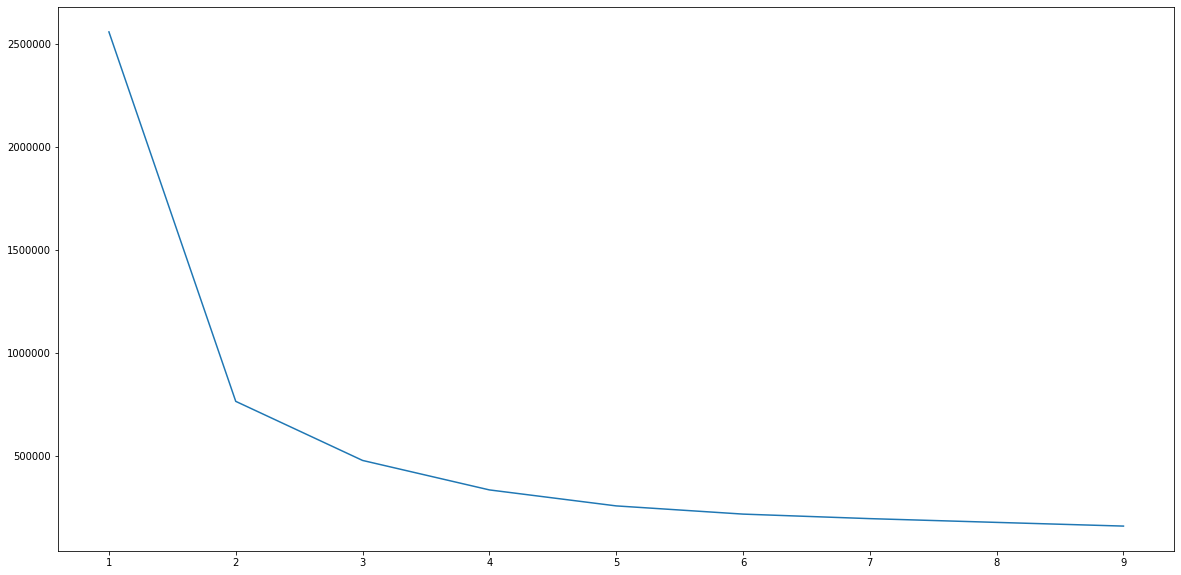

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,10)], [KMeans(n_clusters=k).fit(df).inertia_ for k in range(1,10)]);

### `n_clusters=3`:

In [22]:
k_cluster_3 = KMeans(n_clusters=3).fit(df)

In [23]:
k_cluster_predictions_3 = k_cluster_3.predict(df)

In [24]:
df['K means Group n=3'] = k_cluster_predictions_3

In [25]:
df.groupby(['K means Group n=3']).mean()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('with',)","('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)",K means Group
K means Group n=3,,,,,,,,,,,,,,,,,,,,,
0,79.215686,81.299720,2.896359,3.476190,2.900560,3.378151,5.565826,3.194678,5.432773,5.859944,...,0.000129,0.000034,0.071600,0.000057,0.000021,0.000021,0.000000,0.000401,0.000014,0.00000
1,6.637168,0.336283,0.185841,0.230088,0.053097,0.053097,1.318584,0.840708,1.017699,0.477876,...,0.000340,0.000083,0.049756,0.000170,0.000000,0.000000,0.000369,0.000400,0.000000,0.99115
2,0.000000,77.762712,0.067797,0.050847,1.779661,1.542373,0.745763,0.559322,5.915254,5.728814,...,0.000000,0.000000,0.060772,0.000000,0.000000,0.000000,0.000000,0.000930,0.000000,1.00000


In [26]:
df.groupby(['K means Group n=3']).median()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('with',)","('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)",K means Group
K means Group n=3,,,,,,,,,,,,,,,,,,,,,
0,79.5,82.0,3.0,4.0,3.0,4.0,4.0,1.0,4.0,3.0,...,0.0,0.0,0.074627,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.051724,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,80.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,2.0,...,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,1


#### Comparing `n_clusters=3`:

In [32]:
compare_one = pd.concat([df1, df[['K means Group n=3']]], axis=1)

In [33]:
compare_one

,target,K means Group n=3
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
881,0,1
882,0,0
883,0,0
884,0,0


In [39]:
print('Number of students accepted from Cluster 0:', len(compare_one[(compare_one.target == 1) & (compare_one['K means Group n=3'] == 0)]))
print('Number of students accepted from Cluster 1:', len(compare_one[(compare_one.target == 1) & (compare_one['K means Group n=3'] == 1)]))
print('Number of students accepted from Cluster 2:', len(compare_one[(compare_one.target == 1) & (compare_one['K means Group n=3'] == 2)]))

Number of students accepted from Cluster 0: 214
Number of students accepted from Cluster 1: 0
Number of students accepted from Cluster 2: 4


- **The percentage of students were accepted is only 24% and less than 1% between two clusters.**

In [43]:
print('Percent of accepted students from Cluster 0:', round((214/886)*100, 2), '%')
print('Percent of accepted students from Cluster 2:', round((4/886)*100, 2), '%')

Percent of accepted students from Cluster 0: 24.15 %
Percent of accepted students from Cluster 2: 0.45 %


### `n_clusters=4`:

In [27]:
k_cluster_4 = KMeans(n_clusters=4).fit(df)

In [28]:
k_cluster_predictions_4 = k_cluster_4.predict(df)

In [29]:
df['K means Group n=4'] = k_cluster_predictions_4

In [30]:
df.groupby(['K means Group n=4']).mean()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)",K means Group,K means Group n=3
K means Group n=4,,,,,,,,,,,,,,,,,,,,,
0,79.920553,82.476684,2.962003,3.531952,3.060449,3.538860,4.364421,1.127807,4.324698,3.160622,...,0.000042,0.072895,0.000040,0.000000,0.000000,0.000000,0.000277,0.000017,0.000000,0.000000
1,4.183486,0.348624,0.119266,0.128440,0.018349,0.018349,0.642202,0.522936,0.055046,0.119266,...,0.000086,0.051582,0.000176,0.000000,0.000000,0.000382,0.000287,0.000000,1.000000,1.000000
2,0.000000,77.762712,0.067797,0.050847,1.779661,1.542373,0.745763,0.559322,5.915254,5.728814,...,0.000000,0.060772,0.000000,0.000000,0.000000,0.000000,0.000930,0.000000,1.000000,2.000000
3,76.115108,74.057554,2.597122,3.230216,2.179856,2.640288,10.978417,11.985612,10.676259,17.230216,...,0.000000,0.064149,0.000124,0.000106,0.000106,0.000000,0.001006,0.000000,0.021583,0.028777


In [31]:
df.groupby(['K means Group n=4']).median()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)",K means Group,K means Group n=3
K means Group n=4,,,,,,,,,,,,,,,,,,,,,
0,80,83,3,4,3,4,3,0,4,2,...,0.0,0.075000,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0,80,0,0,2,1,0,0,4,2,...,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,1,2
3,76,78,3,3,2,3,9,10,8,17,...,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.0,0,0


#### Comparing `n_clusters=4`:

In [34]:
compare_two = pd.concat([df1, df[['K means Group n=4']]], axis=1)

In [35]:
compare_two

,target,K means Group n=4
0,1,0
1,1,0
2,1,3
3,1,0
4,1,0
...,...,...
881,0,1
882,0,0
883,0,3
884,0,3


In [41]:
print('Number of students accepted from Cluster 0:', len(compare_two[(compare_two.target == 1) & (compare_two['K means Group n=4'] == 0)]))
print('Number of students accepted from Cluster 1:', len(compare_two[(compare_two.target == 1) & (compare_two['K means Group n=4'] == 1)]))
print('Number of students accepted from Cluster 2:', len(compare_two[(compare_two.target == 1) & (compare_two['K means Group n=4'] == 2)]))
print('Number of students accepted from Cluster 3:', len(compare_two[(compare_two.target == 1) & (compare_two['K means Group n=4'] == 3)]))

Number of students accepted from Cluster 0: 201
Number of students accepted from Cluster 1: 0
Number of students accepted from Cluster 2: 4
Number of students accepted from Cluster 3: 13


- **The percentage of students were accepted is only 23% and 1% in two clusters.**

In [42]:
print('Percent of accepted students from Cluster 0:', round((201/886)*100, 2), '%')
print('Percent of accepted students from Cluster 3:', round((13/886)*100, 2), '%')

Percent of accepted students from Cluster 0: 22.69 %
Percent of accepted students from Cluster 3: 1.47 %


#### Conclusion:
- Seems that for the most part, when using clustering, the students who range are at the top end of the scores get placed together, leading to say that they will be accepted into the academy.  There are also students with 0's across the board, which will put will not place with them with the accepted group.  Yet, there are moments in which students who have high achieving scores, who are not being placed correctly.  A very small percentage of students are being placed in clusters in which they belong.

# Hierarchical Clustering
- Hierarchical clustering gives about the same results as the K-Means

In [28]:
from sklearn.cluster import AgglomerativeClustering 
hier_cluster = AgglomerativeClustering(n_clusters=2).fit(df)

In [29]:
pd.Series(hier_cluster.labels_).value_counts()

1    713
0    173
dtype: int64

In [30]:
n_clusters = 2
cluster_stats = pd.DataFrame()
for i in range(n_clusters):
    cluster_stats['Cluster ' + str(i+1)] = df[hier_cluster.labels_==i].mean(axis=0)
cluster_stats.index = df.columns
cluster_stats = cluster_stats.T
cluster_stats

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('with',)","('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)",K means Group
Cluster 1,4.774566,26.739884,0.144509,0.167630,0.641618,0.560694,1.543353,0.797688,2.901734,2.289017,...,0.000222,0.000054,0.053530,0.000111,0.000000,0.000000,0.000241,0.000578,0.000000,0.988439
Cluster 2,79.220196,81.413745,2.900421,3.481066,2.904628,3.382889,5.469846,3.185133,5.387097,5.862553,...,0.000129,0.000034,0.071627,0.000057,0.000021,0.000021,0.000000,0.000401,0.000014,0.000000
